## Fixes:
- Add violin plots
- Put it in a module / pip / conda
- should go positive to negative rather than reverse
- should we normalize the expression matrix to be between 0 and 1 for each gene, up front for efficiency
- Pearson R vs. Spearman R?

## Installation:
Currently:
conda env create -n py5coding -f http://py5.ixora.io/install/py5_environment.yml
conda install scipy
python setup.py install ## within embedview directory 

In [1]:
%load_ext py5
%gui osx
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

#from umap_explorer import UMAPexplorer

In [3]:
print("LOADING UMAP DATA...")

_umap = pd.read_csv('../data/pbmc3k_umap_20210324.tsv', sep='\t', index_col=0)
_umap.head()

LOADING UMAP DATA...


,UMAP_1,UMAP_2
AAACATACAACCAC-1,11.257295,12.561447
AAACATTGAGCTAC-1,7.166475,-2.057729
AAACATTGATCAGC-1,15.217629,12.554446
AAACCGTGCTTCCG-1,-1.826561,6.781221
AAACCGTGTATGCG-1,7.656905,17.598440


In [4]:
print("LOADING GENE EXPRESSION DATA...")

_expr = pd.read_csv('../data/pbmc3k_expression_log2TP10K_20210324.tsv', sep='\t', index_col=0)
_expr.head()

LOADING GENE EXPRESSION DATA...


,LINC00115,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,AGRN,C1orf159,TNFRSF18,TNFRSF4,...,COL6A2,SPATC1L,LSS,MCM3AP,YBEY,C21orf58,PCNT,DIP2A,S100B,PRMT2
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.251269,0.0,...,0.0,0.0,0.0,0.0,1.658208,0.0,0.0,0.0,0.0,0.000000
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,1.830715,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.830715
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,3.918842,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [5]:
import sys
sys.path.append('../umap_explorer/')
from umap_explorer import UMAPexplorer

test = UMAPexplorer(_umap, _expr)
test.explore_data()

Selected 522 cells
Calculating correlations...


/Users/dylankotliar/miniconda3/envs/py5coding/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Selected gene EEF1A1
Min/max expression level for gene EEF1A1 2.3281806 5.788061
Selected mode 2
Selected 666 cells
Calculating differential expression...
Selected gene S100A6
Min/max expression level for gene S100A6 0.0 5.706114
Selected gene PSAP
Min/max expression level for gene PSAP 0.0 4.99935
Selected mode 2
Selected 325 cells
Calculating differential expression...


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

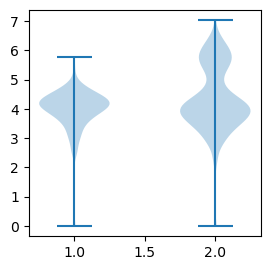

In [7]:
(fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=100)
_ = ax.violin(test.renderer.selected_stats + test.renderer.excluded_stats)

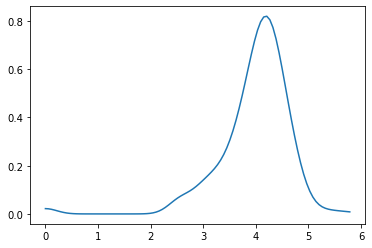

In [9]:
plt.plot(test.renderer.selected_stats[0]['coords'], test.renderer.selected_stats[0]['vals'])

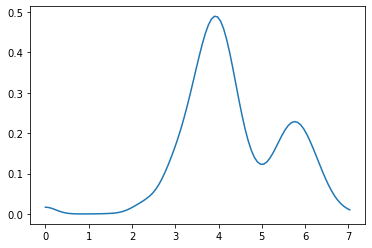

In [10]:
plt.plot(test.renderer.excluded_stats[0]['coords'], test.renderer.excluded_stats[0]['vals'])

In [11]:
test.renderer.excluded_stats[0]

{'vals': array([1.67035049e-02, 1.59811903e-02, 1.39963136e-02, 1.12207334e-02,
        8.23439890e-03, 5.53153846e-03, 3.40145928e-03, 1.91470802e-03,
        9.86825759e-04, 4.66251060e-04, 2.03587759e-04, 8.63775108e-05,
        4.52784532e-05, 4.54763781e-05, 7.45272076e-05, 1.31881005e-04,
        2.21121990e-04, 3.44894427e-04, 5.03507290e-04, 6.99222317e-04,
        9.47275810e-04, 1.29113630e-03, 1.81491313e-03, 2.64351785e-03,
        3.92412884e-03, 5.79077520e-03, 8.32354652e-03, 1.15192135e-02,
        1.52873316e-02, 1.94770416e-02, 2.39306463e-02, 2.85546012e-02,
        3.33942832e-02, 3.86903670e-02, 4.48841513e-02, 5.25417413e-02,
        6.21981816e-02, 7.41760313e-02, 8.84724107e-02, 1.04792652e-01,
        1.22730921e-01, 1.42004591e-01, 1.62608406e-01, 1.84801505e-01,
        2.08944125e-01, 2.35286359e-01, 2.63819991e-01, 2.94238557e-01,
        3.25968476e-01, 3.58199933e-01, 3.89880087e-01, 4.19695978e-01,
        4.46109657e-01, 4.67482856e-01, 4.82268276e-01, 

In [10]:
test.renderer.indices[:10]

[0, 6, 7, 8, 14, 30, 39, 40, 41, 81]

In [11]:
test.renderer.excluded_indices[:10]

[1, 2, 3, 4, 5, 9, 10, 11, 12, 13]

In [12]:
test.expr[test.renderer.excluded_indices, test.renderer.selGene]

array([0.       , 0.       , 2.8591888, ..., 0.       , 0.       ,
       0.       ])

In [16]:
list(_expr['S100A8'].iloc[test.renderer.indices])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.3140957,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.2072425,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.8690995,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.3772445,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.8346845,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [7]:
test.significant_genes.head()

,R,P
LYZ,-0.846425,5.858087e-125
LGALS2,-0.771447,3.388540e-90
S100A8,-0.770657,6.654309e-90
S100A9,-0.747734,7.148332e-82
GPX1,-0.679768,1.938162e-62


In [ ]:
from scipy.stats import pearsonr, spearmanr, ttest_ind

Selected 382 cells
Calculating correlations...


/Users/dylankotliar/miniconda3/envs/py5coding/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Selected gene LTB
Min/max expression level for gene LTB 0.0 6.2515173


In [9]:
selected = _expr.loc[test.selected_cells['index'], :]
remainder = _expr.loc[~_expr.index.isin(test.selected_cells['index']), :]

In [10]:
A = _expr.iloc[:,:10].values
B = _expr.iloc[:,11].values
print(A.shape, B.shape)

(2638, 10) (2638,)


In [19]:
res = ttest_ind(selected.values, remainder.values, axis=0, equal_var=False, nan_policy='propagate', alternative='two-sided')
res = pd.DataFrame([res.statistic, res.pvalue], columns=_expr.columns, index=['T', 'P']).T

In [20]:
res.loc[test.significant_genes.index, :].head()

,T,P
CDA,-19.105316,3.239770e-24
ASB8,-18.150373,5.595836e-37
TNFRSF25,-16.968708,1.782821e-50
DCAF8,-16.148441,5.402525e-44
PRR5,-15.726354,9.606228e-47


In [15]:
res = spearmanr(A,B.reshape(-1,1), axis=None)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 26380 and the array at index 1 has size 2638

In [16]:
A.shape

(2638, 10)

In [24]:
np.corrcoef(A, B)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 10 and the array at index 1 has size 2638

In [13]:
selected.shape

(33, 1838)

In [14]:
remainder.shape

(2605, 1838)

In [18]:
res.statistic

array([-4.35918297e+00,  2.72819241e-01, -4.04673577e+00, ...,
        1.71800118e-01, -1.31253541e+01, -1.50082618e-03])

In [19]:
res.pvalue

array([9.78690737e-05, 7.86695233e-01, 5.34310250e-05, ...,
       8.64664668e-01, 9.94317294e-37, 9.98811460e-01])

In [9]:
z = _umap.values.copy()

In [6]:
test.significant_genes

,R,P
LGALS1,-0.776084,4.668194e-07
LGALS3,-0.770768,6.255527e-07
AIF1,-0.760379,1.084620e-06
PCP2,-0.723926,6.138661e-06
URB2,-0.723828,6.165109e-06
...,...,...
RP11-432I5.1,0.723548,6.241083e-06
SPRY1,0.723828,6.165200e-06
CDKN2A,0.723898,6.146322e-06
RFPL2,0.723902,6.145310e-06


In [7]:
test.selected_cells

,index,proj
0,AAGATTACCGCCTT-1,0.254572
1,AAGCCATGAACTGC-1,0.525927
2,AATGCGTGGACGGA-1,0.118430
3,AATTACGAATTCCT-1,0.195944
4,ACGAGGGACAGGAG-1,0.658741
5,ACGTGATGCCATGA-1,0.330072
6,ACTTAAGATTACTC-1,0.096151
7,AGCACTGATGCTTT-1,0.424344
8,ATACCACTCTAAGC-1,0.184605
9,ATACCGGAATGCTG-1,0.418610


In [6]:
test = UMAPexplorer(_umap.values, _expr.values)
test.explore_data()

Selected 37 cells
Calculating correlations...
Done
Selected gene 1797
Min/max expression level for gene 1797 -0.979315221309662 2.0967912673950195
EXPORTING DATA...
BYE
